In [1]:
# Connected component extraction - morphological image processing
# same as region filling but in stead of intersecting with A', here intersection is done with A
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

'''
(A ^ B) - binary image complement operation
(A & B) - binary image intersection
(A | B) - binary image union
(A & (B ^ 1)) - binary image set difference
'''

'\n(A ^ B) - binary image complement operation\n(A & B) - binary image intersection\n(A | B) - binary image union\n(A & (B ^ 1)) - binary image set difference\n'

Text(0.5, 1.0, 'B kernel')

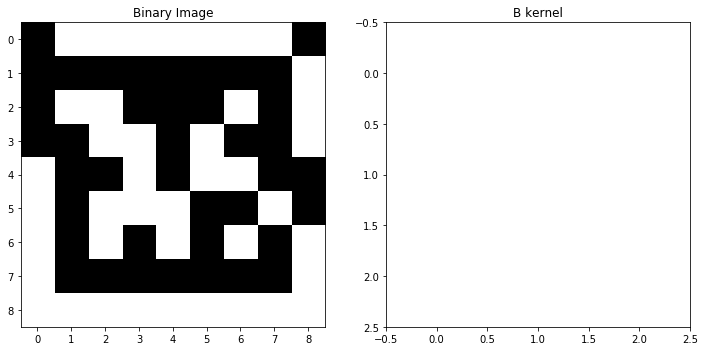

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)
# binary image initialization
binary_image = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 1],
                         [1, 1, 1, 1, 1, 1, 1, 1, 0],
                         [1, 0, 0, 1, 1, 1, 0, 1, 0],
                         [1, 1, 0, 0, 1, 0, 1, 1, 0],
                         [0, 1, 1, 0, 1, 0, 0, 1, 1],
                         [0, 1, 0, 0, 0, 1, 1, 0, 1],
                         [0, 1, 0, 1, 0, 1, 0, 1, 0],
                         [0, 1, 1, 1, 1, 1, 1, 1, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype= np.int32)
# binary image show
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap = "binary")
plt.title("Binary Image")


# n x m image kernel / structuring element dimensions
n, m = 3, 3 # kernal dimensions should be odd

# n x m B kernel initialization
# 8 connected kernel
B = np.ones((3, 3), dtype = np.int32)

# B kernel image show
plt.subplot(1, 2, 2)
plt.imshow(B, cmap = "binary")
plt.title("B kernel")

Text(0.5, 1.0, 'Connected Component Extraction')

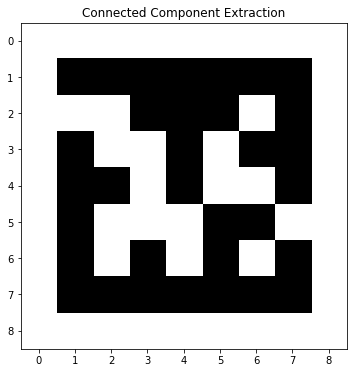

In [3]:
# connected component extraction - morphological image processing
row, col = binary_image.shape
previous_image = np.zeros((row, col), dtype = np.int32)
present_image  = np.zeros((row, col), dtype = np.int32)
present_image[2, 2] = 1

while np.sum(previous_image == present_image) < row * col:
    previous_image = present_image.copy()
    # d = dilate(x[k-1], B)
    for i in range(1, row-1):
        for j in range(1, col-1):
            tmp_image = previous_image[i-1 : i+2, j-1 : j+2].copy()
            if np.sum(tmp_image == B) > 0:
                present_image[i, j] = 1
            else:
                present_image[i, j] = 0
    # intersection(d, complemented image of A)
    present_image = (present_image & binary_image)
    
# filling area show
plt.rcParams["figure.figsize"] = (10, 6)
plt.imshow(present_image, cmap = "binary")
plt.title("Connected Component Extraction")